 ### fourier transformation ###

poging tot fast fourier transformatie 

**general Steps:**

1. loading file --> file of 12 reps (1 set) with 4 columns 
> - time (1500 Hz opgenomen)
> - 3 spieren met 3 verschillende meet punten vastus lateralis, rectus femoris & vastus medialis (voor nu wordt enkel VL gebruikt)
> - nog wa preproccessing 

2. zoeken van de verschillende reps (staat in de emg_handler file)
1. butterworth filter en dan fourier transformatie op los laten voor elke rep en median frequency berekenen (deze wel gewoon met np.median() ma krijg ik rare dingen uit)

In [1]:
import numpy as np
import importlib
import emg_handler
import emg_filter as emg

importlib.reload(emg_handler) # zelf gemaakte class om de verschillende reps te vinden, zitten wat verschillende methodes in ma de 
importlib.reload(emg) # functies voor de fft enal van die dingen

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import stft

%matplotlib inline

Settings

In [2]:
#file_path = r"C:\Users\Simon\Downloads\hyp 5set LE calibration.txt"
file_path = "hyp 8 sets set 8 LE.txt"
fs = 1500
rep_finder = emg_handler.Find_reps(file_path)
rep_finder.df.columns

Index(['time', 'vl', 'rf', 'vm', 'rep'], dtype='object')

analysis

In [3]:
df = rep_finder.reps_rolling_avg(threshold=30, time_between_reps=180)
df.plot(x='time', y='rep')


KeyError: 'Rolling_average_vl'

<Axes: xlabel='time', ylabel='Rolling_average_vl'>

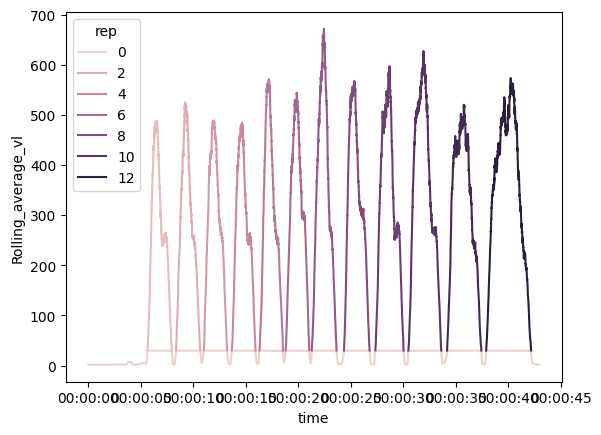

In [ ]:

sns.lineplot(df, x='time', y='Rolling_average_vl', hue='rep')


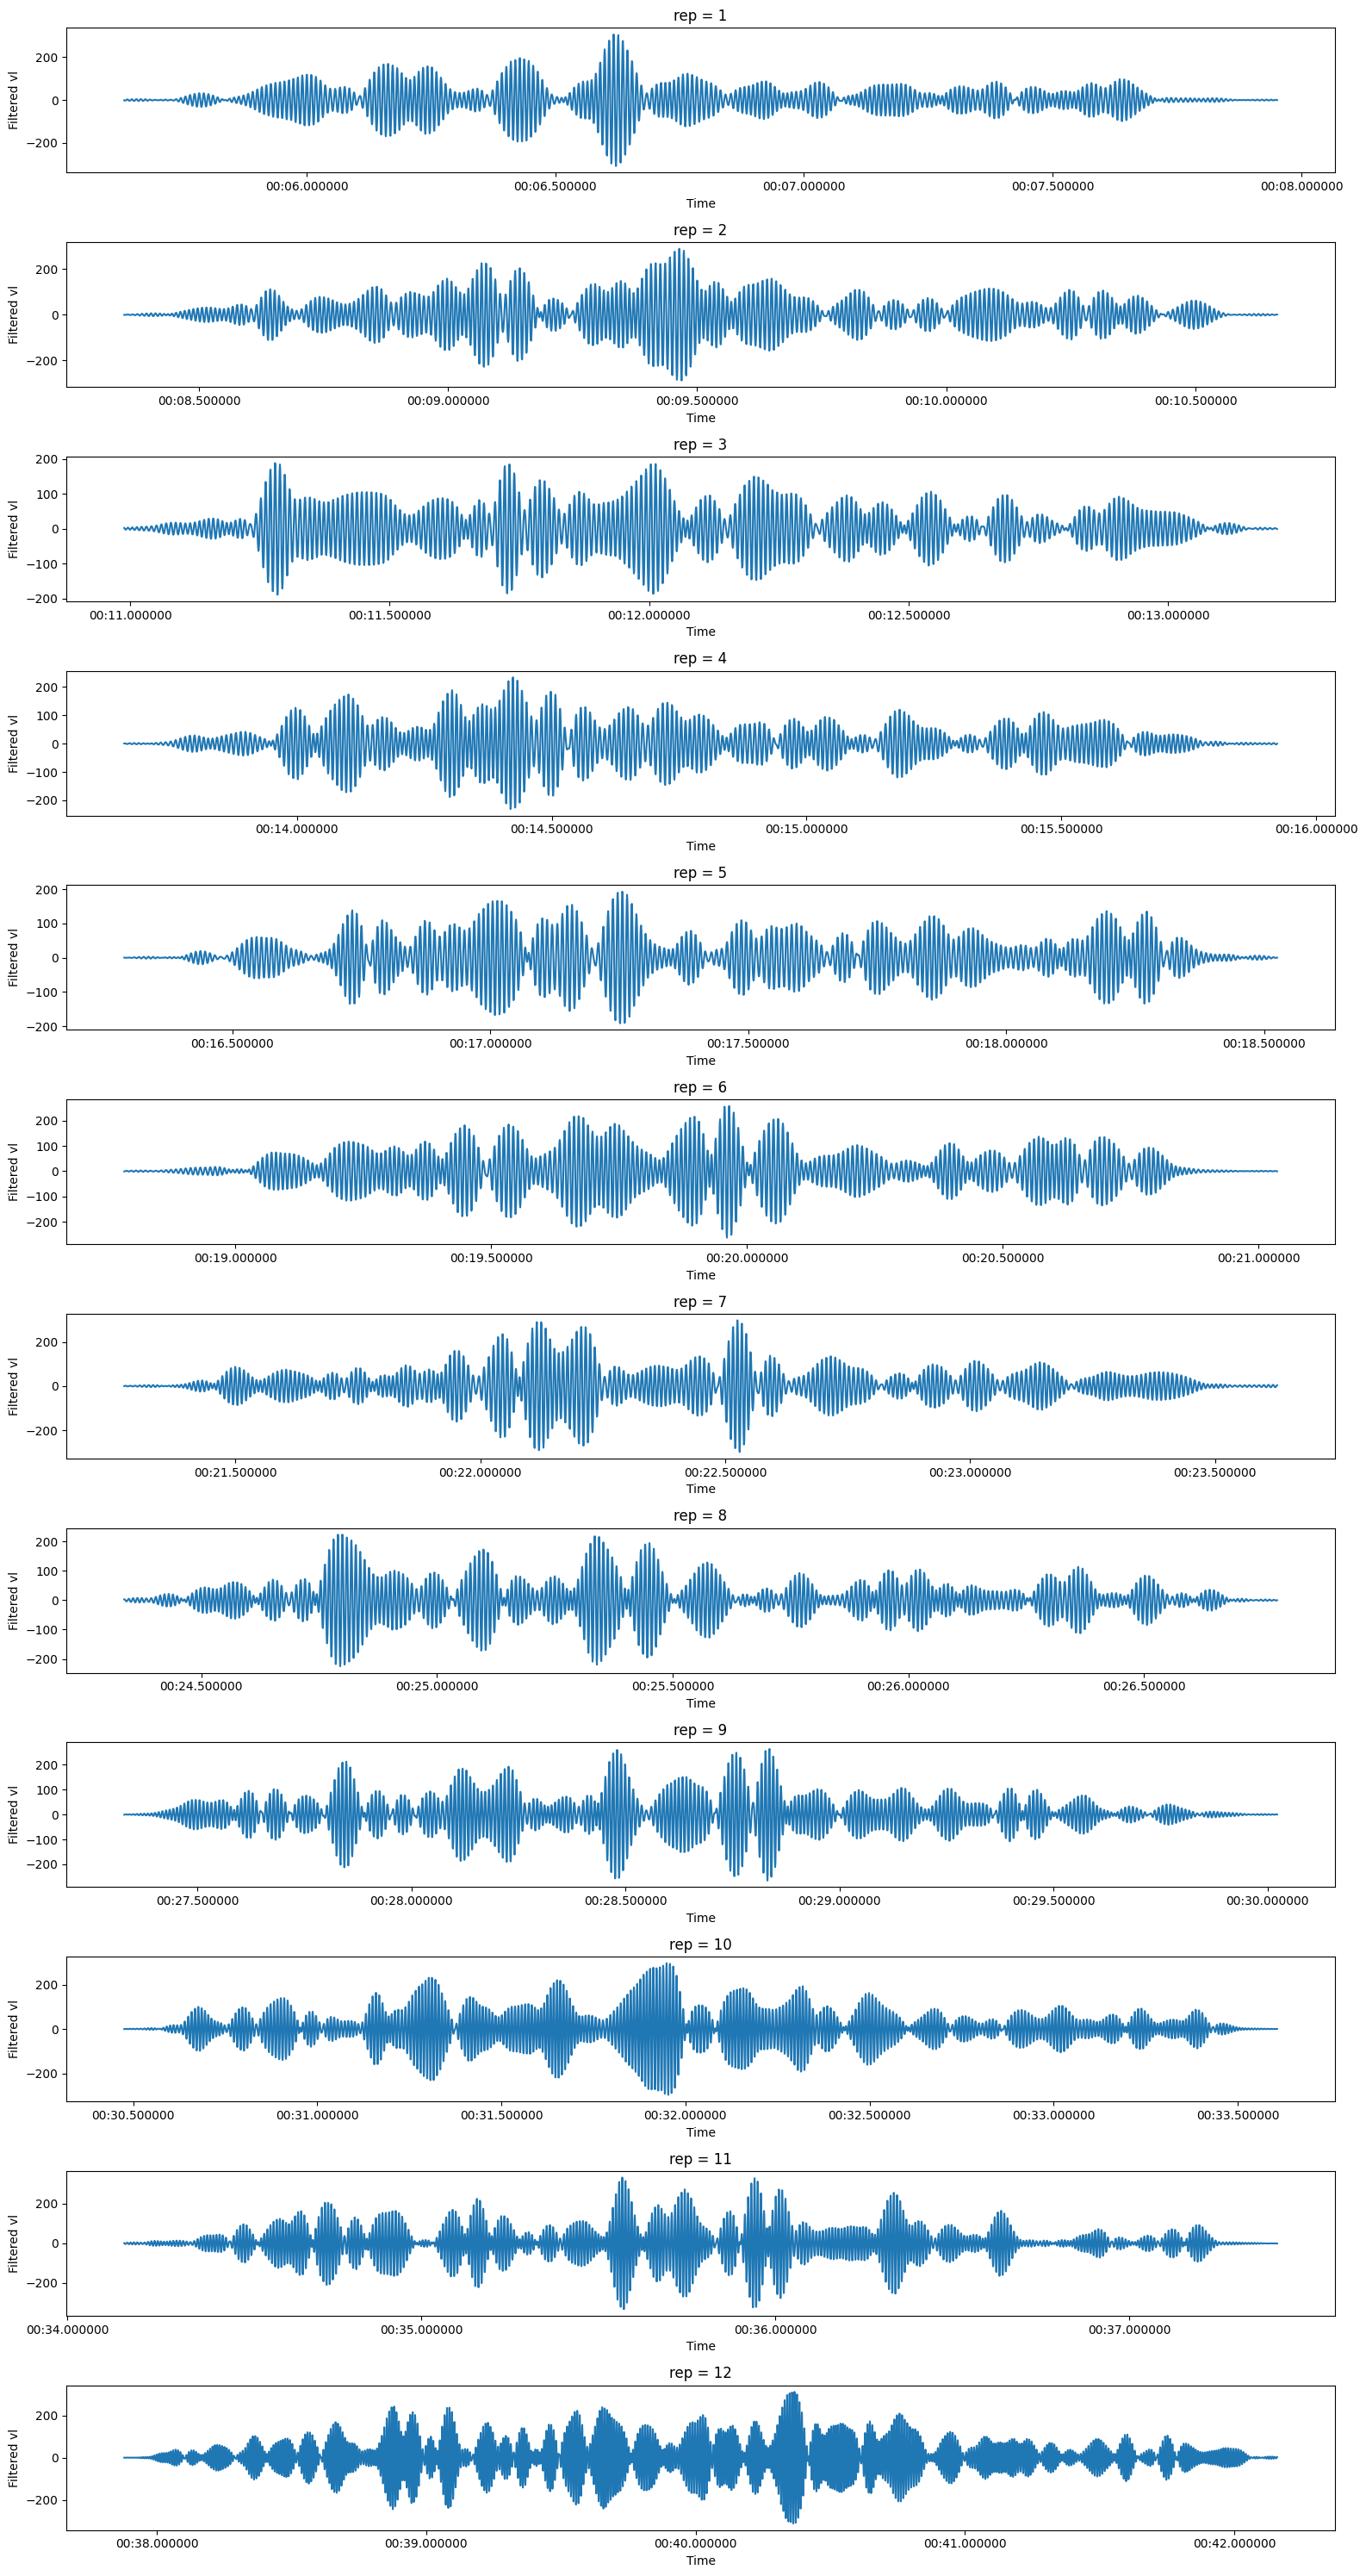

In [ ]:
df['filterd_vl'] = emg.butter_bandpass_filter(df['vl'], 100, 120, fs)

#filter = df['rep'] == 1 
#t,f, Zxx = emg.fourrier_transformatie(df[filter]['vl'], 1500, df[filter]['vl'])
#print(f.shape, t.shape)
#plt.pcolormesh(t, f, Zxx, shading='gouraud')
#plt.title('STFT Magnitude')
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.colorbar(label='Magnitude')
#plt.ylim(0, 50)  # Adjust frequency range if needed
#plt.show()

df['time_seconds'] = df['time'].dt.second
fig, axes = plt.subplots(12, 1, figsize=(16, 30))
axes = axes.flatten()
for i in range(12):
   filter = df['rep']== i + 1 
   sns.lineplot(df[filter], x='time', y='filterd_vl', ax=axes[i])
   axes[i].set_title(f"rep = {i +1}")
   axes[i].set_xlabel('Time')
   axes[i].set_ylabel('Filtered vl')

plt.tight_layout()
plt.show()
#sns.lineplot(df, x='time', y='filterd_vl', hue='rep')


[-2.17153891e+02-0.00000000e+00j -2.17167296e+02-1.01812609e+00j
 -2.17207521e+02-2.03664683e+00j -2.17274600e+02-3.05595739e+00j
 -2.17368590e+02-4.07645395e+00j -2.17489568e+02-5.09853432e+00j
 -2.17637636e+02-6.12259836e+00j -2.17812919e+02-7.14904857e+00j
 -2.18015564e+02-8.17829060e+00j -2.18245743e+02-9.21073387e+00j
 -2.18503651e+02-1.02467920e+01j -2.18789506e+02-1.12868836e+01j
 -2.19103554e+02-1.23314326e+01j -2.19446063e+02-1.33808689e+01j
 -2.19817330e+02-1.44356294e+01j -2.20217676e+02-1.54961580e+01j
 -2.20647451e+02-1.65629066e+01j -2.21107032e+02-1.76363359e+01j
 -2.21596825e+02-1.87169158e+01j -2.22117266e+02-1.98051264e+01j
 -2.22668823e+02-2.09014587e+01j -2.23251993e+02-2.20064153e+01j
 -2.23867309e+02-2.31205113e+01j -2.24515338e+02-2.42442752e+01j
 -2.25196680e+02-2.53782500e+01j -2.25911974e+02-2.65229937e+01j
 -2.26661899e+02-2.76790809e+01j -2.27447173e+02-2.88471031e+01j
 -2.28268556e+02-3.00276711e+01j -2.29126852e+02-3.12214150e+01j
 -2.30022911e+02-3.242898

c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


[-3.94690979e+01-0.00000000e+00j -3.94681151e+01-1.41199507e+00j
 -3.94651651e+01-2.82453658e+00j -3.94602431e+01-4.23817165e+00j
 -3.94533411e+01-5.65344892e+00j -3.94444478e+01-7.07091916e+00j
 -3.94335486e+01-8.49113608e+00j -3.94206258e+01-9.91465706e+00j
 -3.94056579e+01-1.13420439e+01j -3.93886202e+01-1.27738636e+01j
 -3.93694846e+01-1.42106891e+01j -3.93482192e+01-1.56531002e+01j
 -3.93247883e+01-1.71016842e+01j -3.92991526e+01-1.85570369e+01j
 -3.92712687e+01-2.00197633e+01j -3.92410889e+01-2.14904788e+01j
 -3.92085617e+01-2.29698097e+01j -3.91736307e+01-2.44583947e+01j
 -3.91362352e+01-2.59568851e+01j -3.90963094e+01-2.74659468e+01j
 -3.90537825e+01-2.89862606e+01j -3.90085786e+01-3.05185238e+01j
 -3.89606160e+01-3.20634509e+01j -3.89098070e+01-3.36217757e+01j
 -3.88560582e+01-3.51942511e+01j -3.87992692e+01-3.67816524e+01j
 -3.87393323e+01-3.83847774e+01j -3.86761338e+01-4.00044481e+01j
 -3.86095512e+01-4.16415115e+01j -3.85394530e+01-4.32968441e+01j
 -3.84657009e+01-4.497135

c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


[ 7.07674908e+00-0.00000000e+00j  7.07761075e+00-7.89093646e-01j
  7.08019570e+00-1.57853212e+00j  7.08450369e+00-2.36866075e+00j
  7.09053437e+00-3.15982589e+00j  7.09828724e+00-3.95237543e+00j
  7.10776160e+00-4.74665934e+00j  7.11895660e+00-5.54303010e+00j
  7.13187114e+00-6.34184337e+00j  7.14650394e+00-7.14345844e+00j
  7.16285347e+00-7.94823882e+00j  7.18091785e+00-8.75655277e+00j
  7.20069498e+00-9.56877397e+00j  7.22218230e+00-1.03852820e+01j
  7.24537693e+00-1.12064631e+01j  7.27027549e+00-1.20327107e+01j
  7.29687408e+00-1.28644260e+01j  7.32516826e+00-1.37020190e+01j
  7.35515292e+00-1.45459088e+01j  7.38682223e+00-1.53965248e+01j
  7.42016955e+00-1.62543071e+01j  7.45518749e+00-1.71197072e+01j
  7.49186720e+00-1.79931897e+01j  7.53019938e+00-1.88752323e+01j
  7.57017300e+00-1.97663271e+01j  7.61177602e+00-2.06669816e+01j
  7.65499422e+00-2.15777200e+01j  7.69981333e+00-2.24990841e+01j
  7.74621420e+00-2.34316337e+01j  7.79417895e+00-2.43759501e+01j
  7.84368478e+00-2.533263

c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


[  0.           0.88757396   1.77514793   2.66272189   3.55029586
   4.43786982   5.32544379   6.21301775   7.10059172   7.98816568
   8.87573964   9.76331361  10.65088757  11.53846154  12.4260355
  13.31360947  14.20118343  15.0887574   15.97633136  16.86390533
  17.75147929  18.63905325  19.52662722  20.41420118  21.30177515
  22.18934911  23.07692308  23.96449704  24.85207101  25.73964497
  26.62721893  27.5147929   28.40236686  29.28994083  30.17751479
  31.06508876  31.95266272  32.84023669  33.72781065  34.61538462
  35.50295858  36.39053254  37.27810651  38.16568047  39.05325444
  39.9408284   40.82840237  41.71597633  42.6035503   43.49112426
  44.37869822  45.26627219  46.15384615  47.04142012  47.92899408
  48.81656805  49.70414201  50.59171598  51.47928994  52.36686391
  53.25443787  54.14201183  55.0295858   55.91715976  56.80473373
  57.69230769  58.57988166  59.46745562  60.35502959  61.24260355
  62.13017751  63.01775148  63.90532544  64.79289941  65.68047337
  66.568047

c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


[ 1.36014984e+02-0.00000000e+00j  1.36018877e+02+1.96183186e+00j
  1.36030557e+02+3.92432991e+00j  1.36050032e+02+5.88816110e+00j
  1.36077312e+02+7.85399398e+00j  1.36112413e+02+9.82249936e+00j
  1.36155355e+02+1.17943512e+01j  1.36206163e+02+1.37702275e+01j
  1.36264866e+02+1.57508106e+01j  1.36331499e+02+1.77367887e+01j
  1.36406099e+02+1.97288564e+01j  1.36488710e+02+2.17277151e+01j
  1.36579379e+02+2.37340748e+01j  1.36678161e+02+2.57486540e+01j
  1.36785112e+02+2.77721812e+01j  1.36900295e+02+2.98053958e+01j
  1.37023778e+02+3.18490487e+01j  1.37155634e+02+3.39039038e+01j
  1.37295942e+02+3.59707386e+01j  1.37444785e+02+3.80503454e+01j
  1.37602252e+02+4.01435324e+01j  1.37768439e+02+4.22511249e+01j
  1.37943446e+02+4.43739666e+01j  1.38127379e+02+4.65129204e+01j
  1.38320352e+02+4.86688703e+01j  1.38522483e+02+5.08427221e+01j
  1.38733898e+02+5.30354051e+01j  1.38954729e+02+5.52478743e+01j
  1.39185115e+02+5.74811108e+01j  1.39425202e+02+5.97361234e+01j
  1.39675143e+02+6.201395

c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


[ 5.98140317-0.j          5.97972168+1.47512641j  5.97467652+2.95057274j
 ... 55.74476732-0.26203629j 55.74473924-0.187168j
 55.74472052-0.11230049j] [0.00000000e+00 6.38569604e-01 1.27713921e+00 ... 7.47765006e+02
 7.48403576e+02 7.49042146e+02]
[ 94.18985295-0.j          94.19300077-0.82200813j
  94.20244504-1.64415432j ... -44.3734136 +0.14442853j
 -44.3733347 +0.09628537j -44.37328736+0.04814259j] [0.00000000e+00 6.13747954e-01 1.22749591e+00 ... 7.48158756e+02
 7.48772504e+02 7.49386252e+02]


c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


[230.82165383-0.j         230.82779907-1.44181139j
 230.84623622-2.88378843j ... -87.12804823+0.26011685j
 -87.1279582 +0.18579734j -87.12789818+0.11147824j] [0.00000000e+00 4.67144192e-01 9.34288384e-01 ... 7.48364995e+02
 7.48832140e+02 7.49299284e+02]


c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Simon\Documents\Ugent\Master\master proef\jupyter\emg\env\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


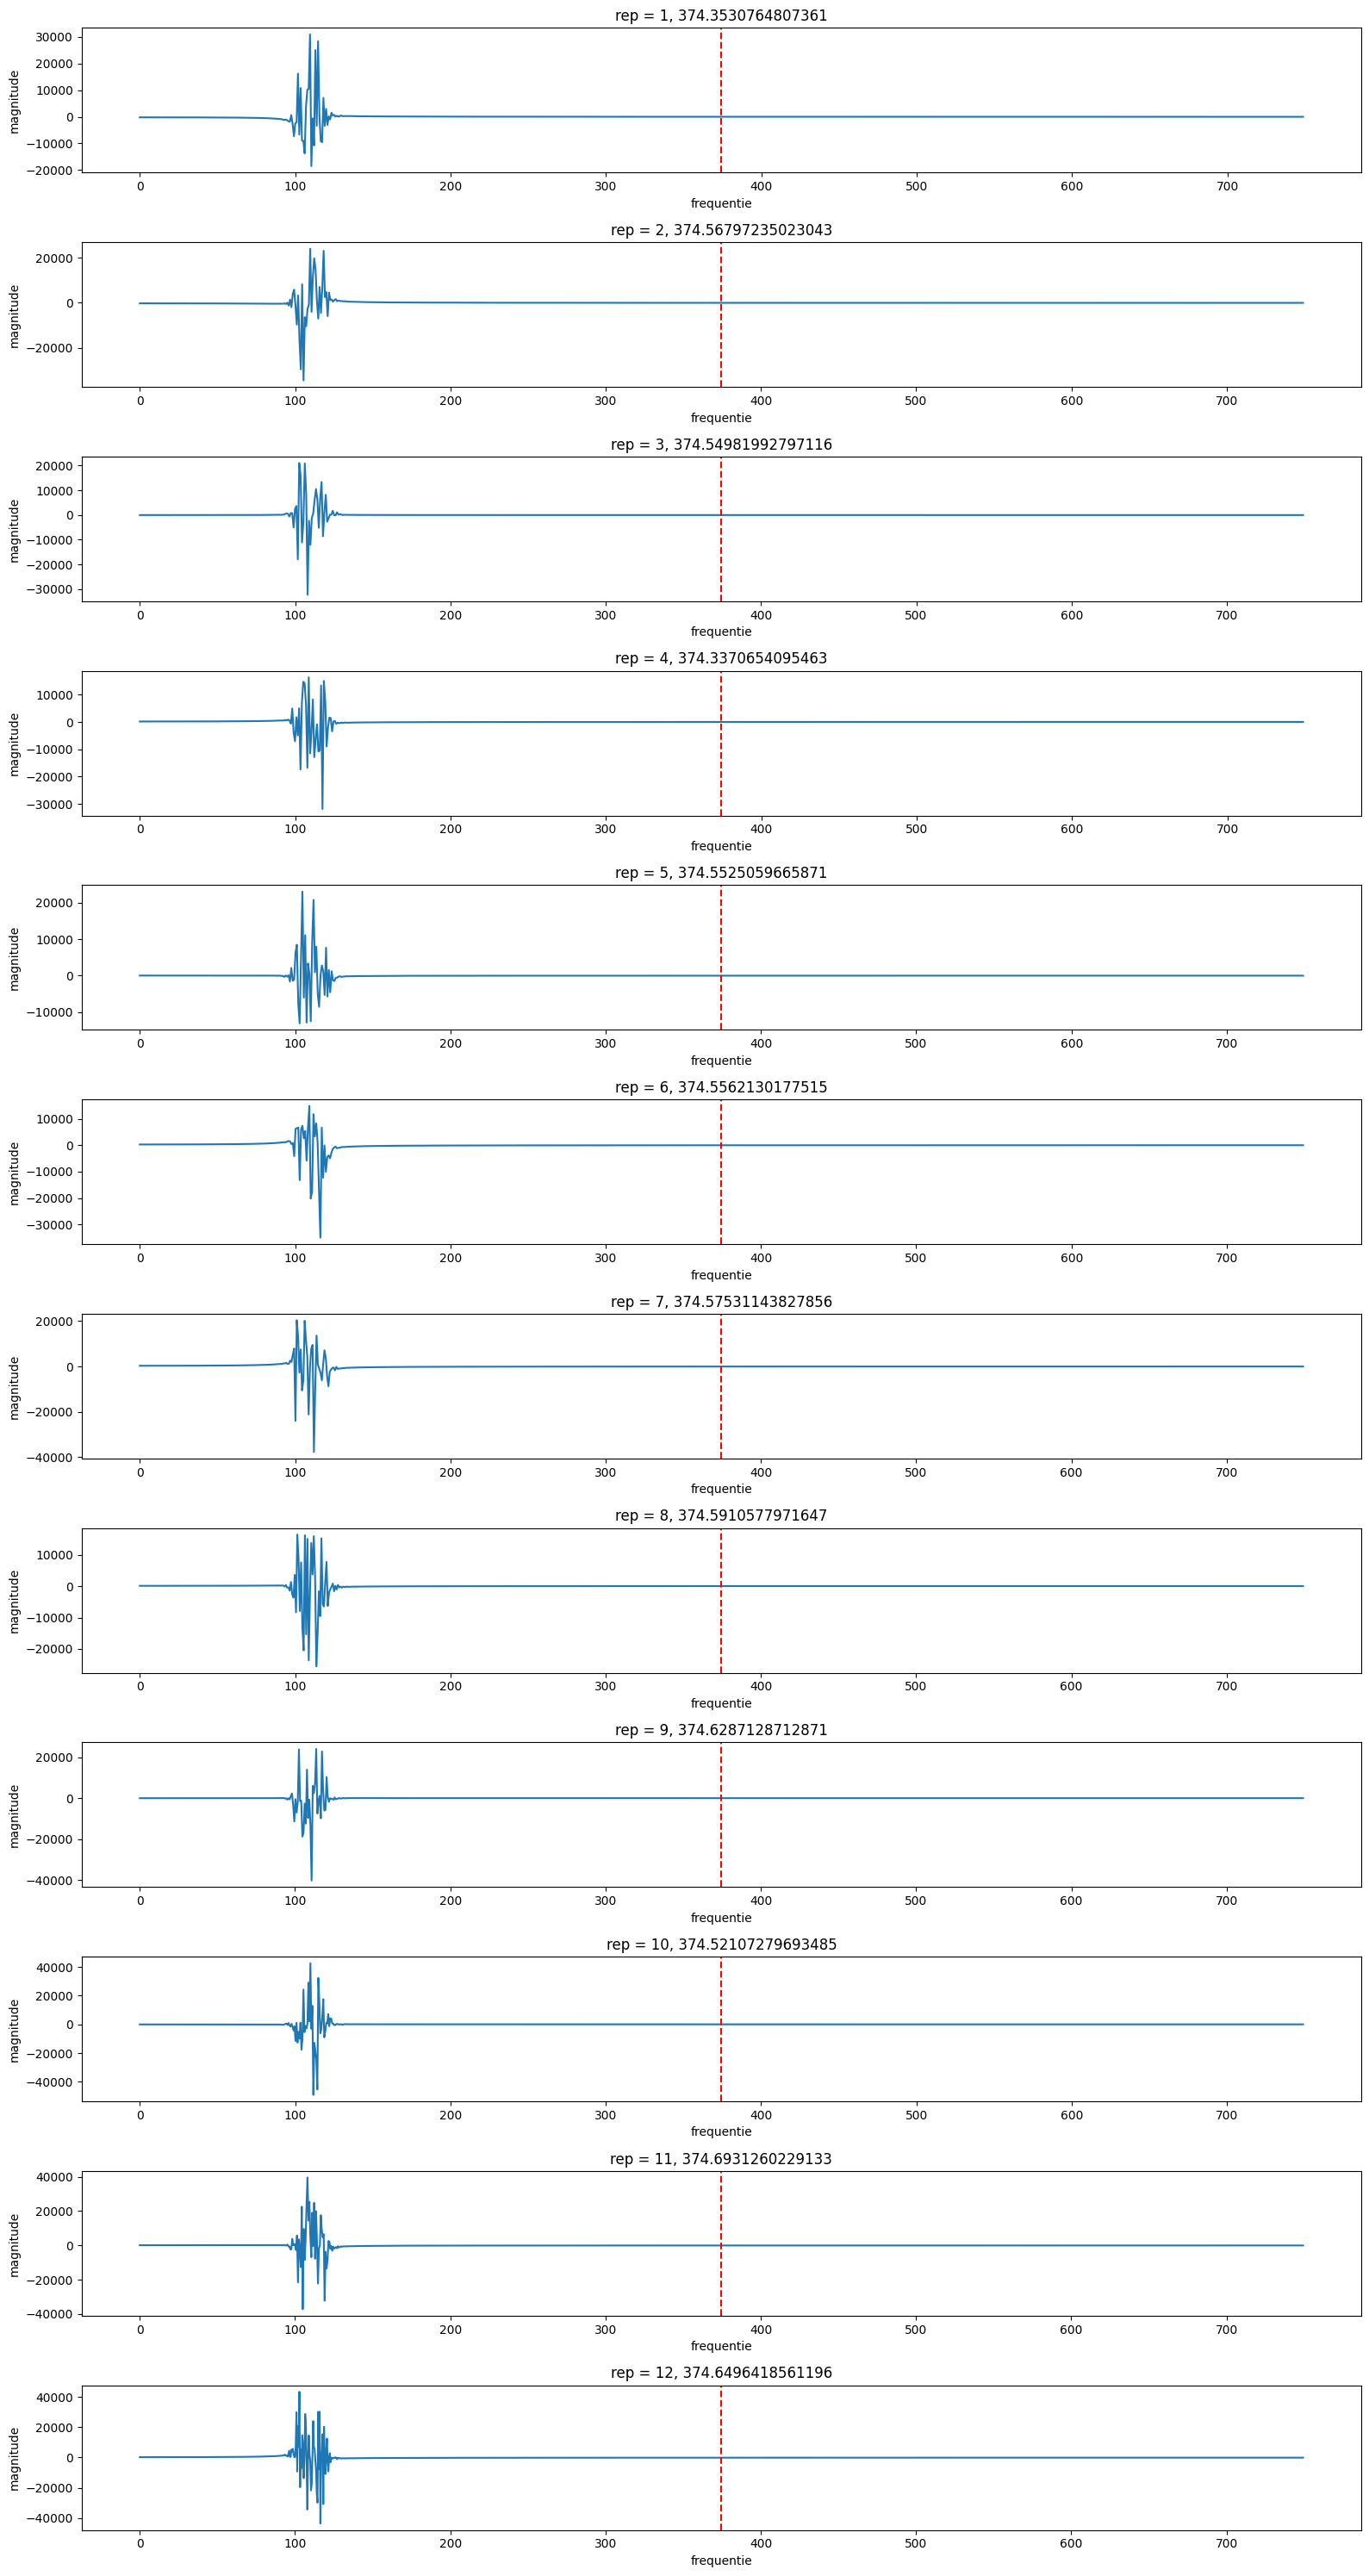

In [ ]:

fig, axes = plt.subplots(12, 1, figsize=(16, 30))
axes = axes.flatten()

for i in range(12):
    filter = df['rep'] == i + 1
    first_half = df[filter][:len(df[filter])//2]
    y, x, mf = emg.fourrier_transformatie(first_half['filterd_vl'], fs)
    print(y, x)
    sns.lineplot(x=x, y=y, ax=axes[i])
    axes[i].set_title(f"rep = {i +1}, {mf}")
    axes[i].set_xlabel('frequentie')
    axes[i].set_ylabel('magnitude')
    axes[i].axvline(x=mf, color='r', linestyle='--')

plt.tight_layout()
plt.show()